In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns

### All Features

In [4]:
fetal = pd.read_csv("fetal_health.csv")
X = fetal.drop(["fetal_health",],axis=1).values
y = fetal["fetal_health"].values.ravel().astype(int) - 1

### Checking Missing Values

In [5]:
fetal.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

### Correlation Analysis

In [7]:
fetal.corr().head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


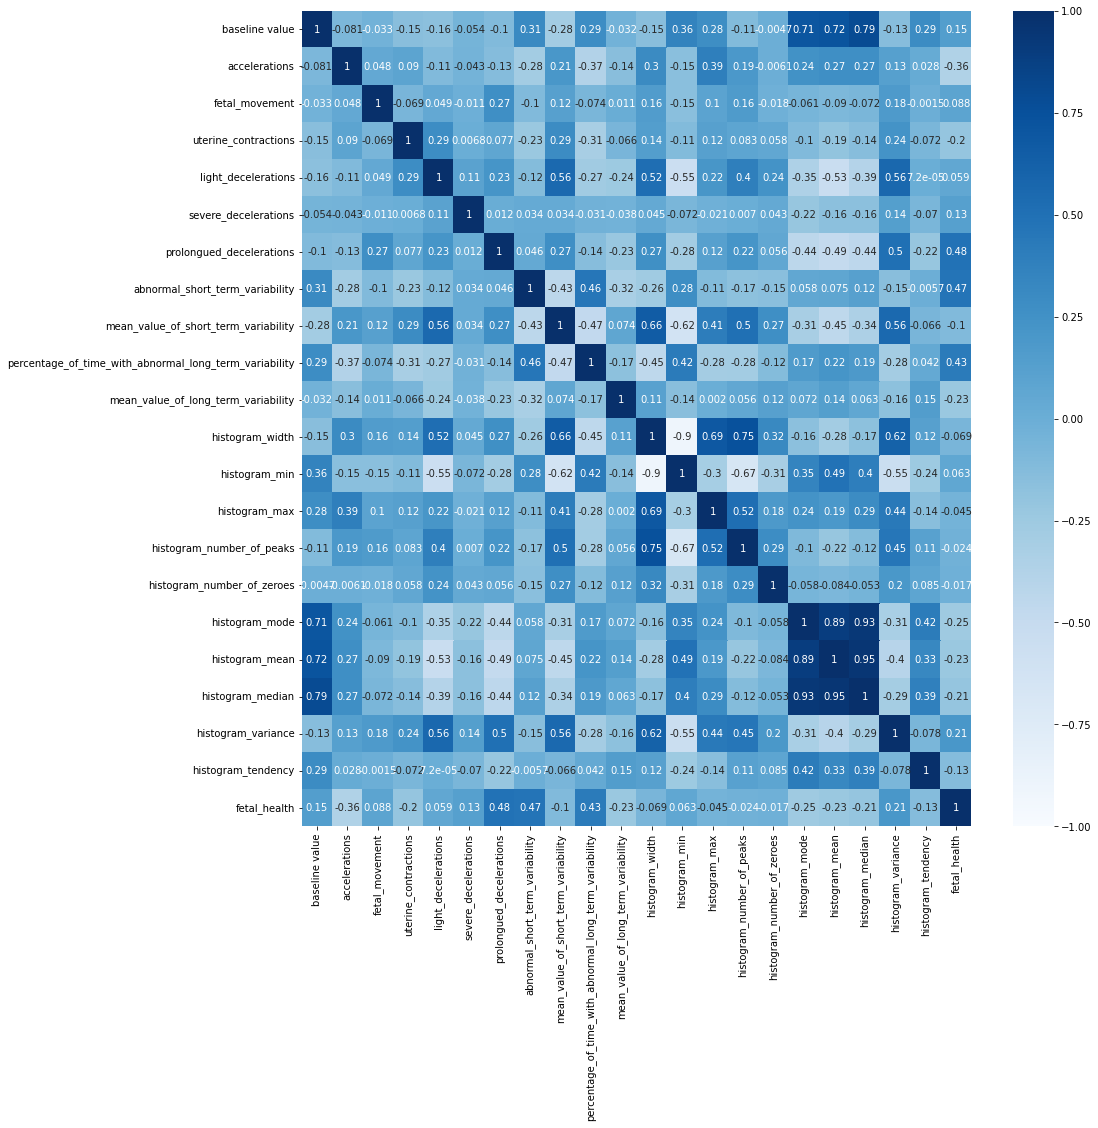

In [8]:
corr = fetal.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='Blues', annot=True)
plt.show()
plt.close()

### Feature Selection (Cor > 0.1)

In [9]:
corr[abs(corr['fetal_health']) > 0.10]['fetal_health']

baseline value                                            0.148151
accelerations                                            -0.364066
uterine_contractions                                     -0.204894
severe_decelerations                                      0.131934
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
mean_value_of_short_term_variability                     -0.103382
percentage_of_time_with_abnormal_long_term_variability    0.426146
mean_value_of_long_term_variability                      -0.226797
histogram_mode                                           -0.250412
histogram_mean                                           -0.226985
histogram_median                                         -0.205033
histogram_variance                                        0.206630
histogram_tendency                                       -0.131976
fetal_health                                              1.00

In [10]:
x = fetal[corr[abs(corr['fetal_health']) > 0.10]['fetal_health'].index]
x = x.drop(['fetal_health'], axis=1)
y = fetal['fetal_health']

### Feature Selection (Cor > 0.15)

In [12]:
corr[abs(corr['fetal_health']) > 0.15]['fetal_health']

accelerations                                            -0.364066
uterine_contractions                                     -0.204894
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
mean_value_of_long_term_variability                      -0.226797
histogram_mode                                           -0.250412
histogram_mean                                           -0.226985
histogram_median                                         -0.205033
histogram_variance                                        0.206630
fetal_health                                              1.000000
Name: fetal_health, dtype: float64

In [13]:
x = fetal[corr[abs(corr['fetal_health']) > 0.15]['fetal_health'].index]
x = x.drop(['fetal_health'], axis=1)
y = fetal['fetal_health']